In [74]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)

In [75]:
X = np.empty((100,2))
X

array([[0.00000000e+000, 6.92758561e-310],
       [0.00000000e+000, 6.92758561e-310],
       [6.92758561e-310, 5.43472210e-323],
       [0.00000000e+000, 3.95252517e-323],
       [5.33274108e-038, 3.64530945e-043],
       [6.38563024e-067, 5.51693714e-048],
       [1.90221420e-052, 5.10752446e+015],
       [6.01347002e-154, 3.84349518e-057],
       [7.49696024e-067, 3.52479428e-057],
       [1.04137565e-042, 3.46162422e-129],
       [6.01347002e-154, 4.66727231e-086],
       [4.08297149e-033, 3.46081310e-086],
       [7.49551699e-067, 9.18131975e-077],
       [6.01347002e-154, 6.77021180e-043],
       [1.64242926e-129, 3.67108687e-062],
       [1.55050240e-129, 1.05811520e+006],
       [7.26983917e-130, 2.73701150e-057],
       [3.93249432e-067, 2.52456034e-052],
       [1.10628858e-052, 2.56388944e-153],
       [1.10280204e-052, 2.00324715e-076],
       [5.10736988e+015, 1.36966714e-071],
       [3.90063858e+020, 6.06163251e-154],
       [9.08171756e+010, 1.08551584e-042],
       [2.8

In [76]:
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

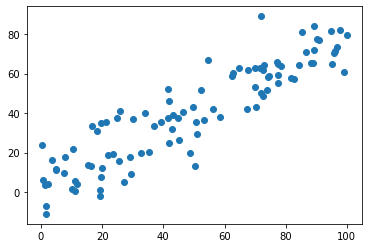

In [77]:
plt.scatter(X[:,0], X[:,1])

# demean

In [78]:
def demean(X):
    return X - np.mean(X, axis=0)

In [79]:
X_demean = demean(X)
X_demean

array([[ 20.83888589,  22.45631742],
       [ 35.21383798,  24.41598954],
       [ 18.44660729,  21.5483672 ],
       [ 23.58097942,  24.17539699],
       [ 45.94096944,  24.66355269],
       [-47.9345066 , -36.80953473],
       [ -7.84605642,  -2.57732317],
       [-44.32354692, -28.3010921 ],
       [-39.21197017, -38.83645599],
       [  1.60180428,  -4.93602824],
       [-29.18007237, -28.01217985],
       [ 25.21059058,  18.54823818],
       [-29.915626  , -42.15427404],
       [ 20.87964892,  13.16982543],
       [-19.88201571, -30.90457654],
       [ 28.24311913,  19.03178146],
       [-48.69394242, -34.14417817],
       [-37.91906094, -34.81833878],
       [-38.1094591 , -39.67812496],
       [-24.43800343,  -2.9183088 ],
       [-46.88119638, -36.36423887],
       [ 23.52728912,   8.38826045],
       [-15.20133211,  -0.35532653],
       [-29.45451066,  -5.15830069],
       [ 41.71313298,  37.09074303],
       [ 48.6298722 ,  42.08803005],
       [  4.07542811,  -3.58078078],
 

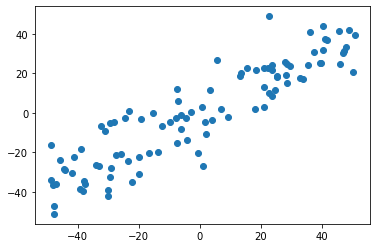

In [80]:
plt.scatter(X_demean[:,0], X_demean[:,1])

## 梯度上升法

In [81]:
def f(w,X):
    return np.sum((X @ w)**2)/len(X)

In [82]:
def df_math(w,X):
    return (X.T @ (X @ w)) * 2 /len(X)

In [83]:
def df_debug(w, X, epsilon = 0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X))/ (2 * epsilon)
    return res


In [84]:
def direction(w):
    return w/np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    cur_iter = 0 
    w = direction(initial_w)
    while cur_iter < n_iters:
        gradient = df(w,X)
        last_w = w
        w = direction(w + eta * gradient)
        if(abs(f(w,X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [85]:
initial_w = np.random.random(X.shape[1]) # 注意2：不能用0向量开始
initial_w.T

array([0.32292754, 0.87410072])

In [86]:
eta = 0.001
# 注意3： 不能使用StandardScaler标准化数据

In [87]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.77660882, 0.62998313])

In [88]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.77660882, 0.62998313])

In [89]:
%%time
w = gradient_ascent(df_math, X_demean, initial_w, eta)
w

CPU times: user 711 µs, sys: 113 µs, total: 824 µs
Wall time: 768 µs


array([0.77660882, 0.62998313])

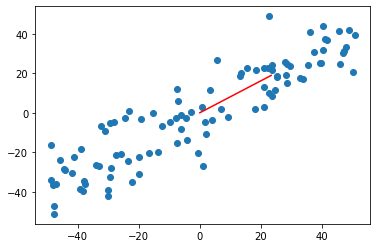

In [90]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

# 使用极端数据集测试

In [91]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

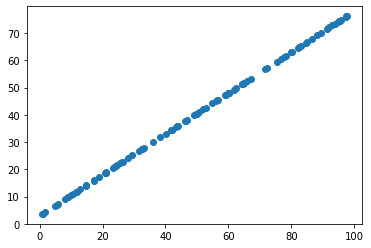

In [92]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()


In [93]:
X2_demean = demean(X2)

In [94]:
%%time
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)
w2

CPU times: user 1.02 ms, sys: 164 µs, total: 1.19 ms
Wall time: 1.15 ms


array([0.79999971, 0.60000039])

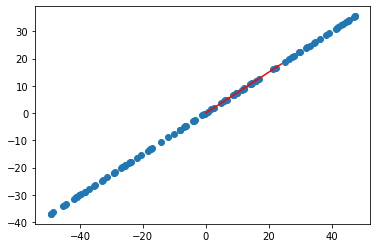

In [95]:
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()

# 随机梯度上升法

In [96]:
np.random.permutation(len(X))

array([83, 50,  2, 71, 82, 41, 38, 29, 11, 95, 33,  0, 26, 61, 37, 81, 55,
       97, 85, 40, 77, 90, 69, 42, 89, 21, 54, 74, 94, 28,  8, 15, 13,  5,
       75, 58, 64, 79,  4, 20, 43, 99, 19, 91, 56, 47, 59, 16, 65, 48, 62,
       45, 10, 96, 35, 80, 30, 70, 44, 36, 84, 72, 23, 68, 25,  6, 73, 32,
       67, 46, 31, 57, 12, 27, 92, 76, 52, 98,  1, 39,  3, 60, 14, 18, 87,
       24, 63, 66,  7, 88, 93, 34, 49, 53, 22, 51,  9, 86, 78, 17])

In [97]:
def dJ_sgd(w, X_i):
    return (X_i.T * (X_i @ w)) * 2 /len(X)

def sgd(X, initial_w, n_iters):

    t0, t1 = 5, 50
    def learning_rate(t):
        return t0 / (t + t1)
    
    w = direction(initial_w)
    for cur_iter in range(n_iters):
        indexes = np.random.permutation(len(X))
        X_new = X[indexes]
        for i in range(len(X)):
            gradient = dJ_sgd(w, X_new[i])
            w = w + learning_rate(cur_iter*len(X) + i) * gradient
            w = direction(w)
    return w

In [98]:
%%time
initial_w = np.random.random(X.shape[1])  # 不能取0
initial_w
sgd(X_demean,initial_w,5)

CPU times: user 11.2 ms, sys: 3.53 ms, total: 14.7 ms
Wall time: 11.7 ms


array([0.77467387, 0.63236096])

# 获得前N个主成分

In [99]:
initial_w = np.random.random(X.shape[1]) # 注意2：不能用0向量开始
eta = 0.001
# 注意3： 不能使用StandardScaler标准化数据
w = gradient_ascent(df_debug, X_demean, initial_w, eta)
w

array([0.77660942, 0.62998239])

In [100]:
X2 = np.empty(X.shape)
for i in range(len(X)):
    X2[i] = X_demean[i] - X_demean[i] @ w * w
X2

array([[-2.71626772e+00,  3.34847314e+00],
       [ 2.03006166e+00, -2.50255411e+00],
       [-3.22149513e+00,  3.97129113e+00],
       [-2.46905177e+00,  3.04371822e+00],
       [ 6.16630173e+00, -7.60149509e+00],
       [-1.01506756e+00,  1.25132234e+00],
       [-1.85296965e+00,  2.28424431e+00],
       [-3.74471554e+00,  4.61628996e+00],
       [ 3.43838532e+00, -4.23866204e+00],
       [ 3.05067365e+00, -3.76071133e+00],
       [ 2.12404304e+00, -2.61840945e+00],
       [ 9.30793620e-01, -1.14743382e+00],
       [ 8.75114134e+00, -1.07879505e+01],
       [ 1.84332881e+00, -2.27235959e+00],
       [ 7.22934120e+00, -8.91195469e+00],
       [ 1.89776323e+00, -2.33946350e+00],
       [-2.62049716e+00,  3.23041220e+00],
       [ 1.98564742e+00, -2.44780256e+00],
       [ 4.28773425e+00, -5.28569510e+00],
       [-8.27111788e+00,  1.01962026e+01],
       [-8.14893225e-01,  1.00455786e+00],
       [ 5.23350034e+00, -6.45158620e+00],
       [-5.85922775e+00,  7.22295031e+00],
       [-9.

In [101]:
X2 = X_demean - (X_demean @ w).reshape(-1,1) * w.reshape(1,-1)
X2

array([[-2.71626772e+00,  3.34847314e+00],
       [ 2.03006166e+00, -2.50255411e+00],
       [-3.22149513e+00,  3.97129113e+00],
       [-2.46905177e+00,  3.04371822e+00],
       [ 6.16630173e+00, -7.60149509e+00],
       [-1.01506756e+00,  1.25132234e+00],
       [-1.85296965e+00,  2.28424431e+00],
       [-3.74471554e+00,  4.61628996e+00],
       [ 3.43838532e+00, -4.23866204e+00],
       [ 3.05067365e+00, -3.76071133e+00],
       [ 2.12404304e+00, -2.61840945e+00],
       [ 9.30793620e-01, -1.14743382e+00],
       [ 8.75114134e+00, -1.07879505e+01],
       [ 1.84332881e+00, -2.27235959e+00],
       [ 7.22934120e+00, -8.91195469e+00],
       [ 1.89776323e+00, -2.33946350e+00],
       [-2.62049716e+00,  3.23041220e+00],
       [ 1.98564742e+00, -2.44780256e+00],
       [ 4.28773425e+00, -5.28569510e+00],
       [-8.27111788e+00,  1.01962026e+01],
       [-8.14893225e-01,  1.00455786e+00],
       [ 5.23350034e+00, -6.45158620e+00],
       [-5.85922775e+00,  7.22295031e+00],
       [-9.

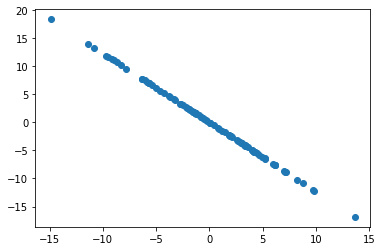

In [102]:
plt.scatter(X2[:,0],X2[:,1])

In [103]:
initial_w = np.random.random(X.shape[1]) # 注意2：不能用0向量开始
eta = 0.001
# 注意3： 不能使用StandardScaler标准化数据
w2 = gradient_ascent(df_math, X2, initial_w, eta)
w2

array([-0.62996682,  0.77662205])

In [109]:
def first_n_components(n, X, eta = 0.01, n_iters = 1e4, epsilon = 1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)

    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = gradient_ascent(df_math,X_pca,initial_w,eta)
        res.append(w)

        X_pca = X_pca - (X_pca @ w).reshape(-1,1) * w.reshape(1,-1)
    return res

W = first_n_components(2,X)
W[0] @ W [1]

5.422249397368795e-06

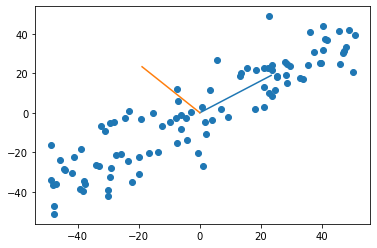

In [108]:
plt.scatter(X_demean[:,0], X_demean[:,1])
for i in range(len(W)):
    plt.plot([0, W[i][0]*30], [0, W[i][1]*30])
plt.show()